In [1]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
from numpy import array
import tensorflow as tf
import pickle
import keras
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import concatenate
from keras.layers.recurrent import LSTM,GRU
from sklearn.model_selection import TimeSeriesSplit
import time
import itertools
import os
import warnings
import io
import inspect
import random 
from random import randrange
import datetime
from datetime import datetime
from random import randrange
from tensorflow.keras.optimizers import Adam
from time import sleep
from tqdm import tqdm
from gurobipy import *
warnings.filterwarnings('ignore')

In [2]:
p2021 = pd.read_excel(fr"C:\Users\Jonas\Dateien\univ\risikolevel\data\fcr_price\RESULT_OVERVIEW_CAPACITY_MARKET_FCR_2021-01-01_2021-12-31.xlsx")
p2020 = pd.read_excel(fr"C:\Users\Jonas\Dateien\univ\risikolevel\data\fcr_price\RESULT_OVERVIEW_CAPACITY_MARKET_FCR_2020-01-01_2020-12-31.xlsx")
p2019 = pd.read_excel(fr"C:\Users\Jonas\Dateien\univ\risikolevel\data\fcr_price\RESULT_OVERVIEW_CAPACITY_MARKET_FCR_2019-01-01_2019-12-31.xlsx")
p2021['CROSSBORDER_SETTLEMENTCAPACITY_PRICE_[EUR/MW]'] = pd.to_numeric(p2021['CROSSBORDER_SETTLEMENTCAPACITY_PRICE_[EUR/MW]'],errors = 'coerce')
p2020['CROSSBORDER_SETTLEMENTCAPACITY_PRICE_[EUR/MW]'] = pd.to_numeric(p2020['CROSSBORDER_SETTLEMENTCAPACITY_PRICE_[EUR/MW]'],errors = 'coerce')
p2019['CROSSBORDER_SETTLEMENTCAPACITY_PRICE_[EUR/MW]'] = pd.to_numeric(p2019['CROSSBORDER_SETTLEMENTCAPACITY_PRICE_[EUR/MW]'],errors = 'coerce')

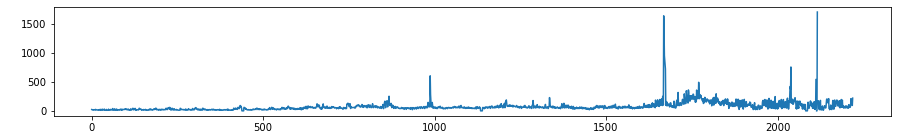

In [3]:
plt.figure(figsize=(15,2))
plt.plot(p2021['CROSSBORDER_SETTLEMENTCAPACITY_PRICE_[EUR/MW]']) 
plt.ylabel(' ')
plt.show()

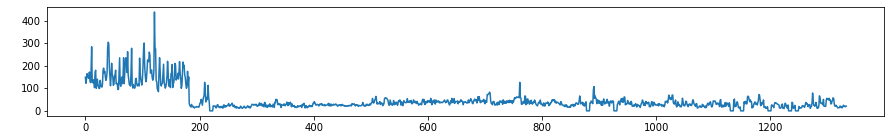

In [4]:
plt.figure(figsize=(15,2))
plt.plot(p2020['CROSSBORDER_SETTLEMENTCAPACITY_PRICE_[EUR/MW]']) 
plt.ylabel(' ')
plt.show()

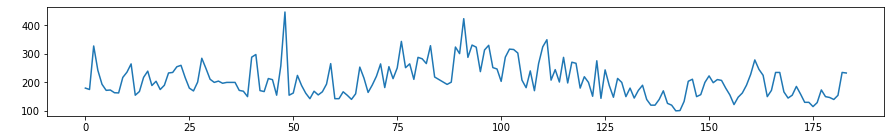

In [5]:
plt.figure(figsize=(15,2))
plt.plot(p2019['CROSSBORDER_SETTLEMENTCAPACITY_PRICE_[EUR/MW]']) 
plt.ylabel(' ')
plt.show()

In [6]:
p_mean21 = p2021['CROSSBORDER_SETTLEMENTCAPACITY_PRICE_[EUR/MW]'].mean()/4
p_mean20a = p2020.iloc[0:182,5].mean()/24 #until 30.06.2020 it is a daily price
p_mean20b = p2020.iloc[182:1334,5].mean()/4 #from 1.07.2020 it is a 4-hourly price
p_mean20 = (181*p_mean20a+184*p_mean20b)/365
p_mean19 = p2019['CROSSBORDER_SETTLEMENTCAPACITY_PRICE_[EUR/MW]'].mean()/24
p_mean = (365*p_mean21 + 365*p_mean20 + 175*p_mean19)/905
p_mean

11.892291803964707